In [1]:
import pickle

In [2]:
# 불용어 목록 선언
stopwords = list(set([
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', '방이', '제대로',
    '고', '면', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', '그렇다',
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '문제', '경우', '부분', '이다',
    '내용', '결과', '자체', '가지', '있다',
    '않았어요', '있었어요', '했어요', '했는데요', '있는데요', '합니다', '없다', '나다','생각하다',
    '했다', '같다', '네요','아니다',
    '좀', '너무', '정말', '많이', '조금',
    '사장', '이용', '용하다', '물이',
    '뿐', '대로', '만', '따름', '나름', '김에', '터',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니', '않다', '안되다','안','그냥',
    '가다', '오다', '주다', '말다', '나다', '받다', '알다', '모르다', '싶다', '생각하다', '들다'
]))
stopwords = set(stopwords)

In [3]:
# 저장된 내용을 가져와 변수에 할당하기
with open('X_train.pickle', 'rb') as f :
    X_train = pickle.load(f)
with open('X_test.pickle', 'rb') as f :
    X_test = pickle.load(f)

In [4]:
with open('y_train.pickle', 'rb') as f :
    y_train = pickle.load(f)
with open('y_test.pickle', 'rb') as f :
    y_test = pickle.load(f)

In [6]:
# 학습 데이터의 문제, 답 개수
print(len(X_train),len(y_train))
# 테스트 데이터의 문제, 답 개수
print(len(X_test),len(y_test))

1000 1000
453 453


In [ ]:
'''
print(X_train[:10])
print("*"*20)
print(X_test[:10])
print("*"*20)
print(y_train[:10])
print("*"*20)
print(y_test[:10])
print("*"*20)
'''

In [8]:
print(len(X_train))
#for item in X_train[:10] :
#    print(item)
for i in range(10) :
    print(y_train[i],X_train[i])

1000
['좋습니다', '깨끗하고', '따뜻하고', '잘', '지내고', '갑니다'] ['좋습니다', '깨끗하고', '따뜻하고', '잘', '지내고', '갑니다']
['자주', '하는', '곳', '조용하고', '따뜻하고', '스타', '일러가', '있어서', '좋고', '하루', '편히', '쉴', '있는', '곳', '설', '맞', '춤', '편하게', '잘', '쉬', '갑니다', '감사합니다'] ['자주', '하는', '곳', '조용하고', '따뜻하고', '스타', '일러가', '있어서', '좋고', '하루', '편히', '쉴', '있는', '곳', '설', '맞', '춤', '편하게', '잘', '쉬', '갑니다', '감사합니다']
['깔끔하고', '좋습니다', '늘', '만족합니다'] ['깔끔하고', '좋습니다', '늘', '만족합니다']
['역시', '좋아요'] ['역시', '좋아요']
['복도', '담배', '냄새', '심하고', '침구', '털', '있었고', '내부', '문짝', '떨어져', '있었습니다', '바닥', '에도', '먼지', '머리카락', '있고', '살짝', '끈적끈적합니다', '방과', '화장실', '넓고', '스타', '일러가', '있다는', '외', '에는', '딱히'] ['복도', '담배', '냄새', '심하고', '침구', '털', '있었고', '내부', '문짝', '떨어져', '있었습니다', '바닥', '에도', '먼지', '머리카락', '있고', '살짝', '끈적끈적합니다', '방과', '화장실', '넓고', '스타', '일러가', '있다는', '외', '에는', '딱히']
['청결', '친절', '짱'] ['청결', '친절', '짱']
['침대', '불편했어요', '냉장고', '안도', '더럽고', '화장실', '욕조', '도', '청결하지', '못', '하루', '잠', '잔', '걸', '만족'] ['침대', '불편했어요', '냉장고', '안도', '더럽고', '화장실', '욕조', '도', '청결하지',

In [9]:
# 형태소 분석된 훈련데이터에서 모든 단어의 리스트를 생성
all_list = []
all_list_append = [] # 문장 단위로 단어 리스트들을 저장
all_list_extend = [] # 전체 문장에서 나온 단어들을 하나로 합친 리스트
for item in X_train :
    # list.append(원소) -> 원소를 list에 추가 -> 이 원소가 리스트라면??
    # [리스트, 리스트, 리스트 .... ]
    #all_list.extend(item)
    all_list_append.append(item)     # [['오늘', '날씨', '좋다'], ['영화', '재미있다'], ...]
    all_list_extend.extend(item)     # ['오늘', '날씨', '좋다', '영화', '재미있다', ...]
    # list.extend(리스트) -> 리스트의 원소를 꺼내서, list에 원소로 추가
    # [원소, 원소, 원소, 원소, .... ]

In [10]:
print(all_list_append[:3])   # 앞 3개의 문장(단어 리스트)
print(all_list_extend[:10])  # 전체 단어 중 앞 10개

[['좋습니다', '깨끗하고', '따뜻하고', '잘', '지내고', '갑니다'], ['자주', '하는', '곳', '조용하고', '따뜻하고', '스타', '일러가', '있어서', '좋고', '하루', '편히', '쉴', '있는', '곳', '설', '맞', '춤', '편하게', '잘', '쉬', '갑니다', '감사합니다'], ['깔끔하고', '좋습니다', '늘', '만족합니다']]
['좋습니다', '깨끗하고', '따뜻하고', '잘', '지내고', '갑니다', '자주', '하는', '곳', '조용하고']


In [11]:
# 중복 제거된 단어 집합 만들기
all_list = list(set(all_list_extend))  # set()으로 중복 제거 후 list로 변환
print(len(all_list))  # 고유 단어 수 출력

7022


In [ ]:
# 단어 사전 { '단어A' : 번호1, '단어B' : 번호2 ... }

In [ ]:
# 문장을 구성하는 단어를 토큰의 번호로 표시
# 문장 인코딩의 예
# [ 1, 4, 10, 2, 55 ]

In [12]:
# 텐서플로우의 텍스트 전처리 라이브러리에서 토크나이저를 가져옴
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
# 토크나이저 객체 생성 (빈도순 단어 사전을 만들기 위해)
tokenizer = Tokenizer()
# 토크나이저에 훈련 데이터 전체를 학습시켜 단어 사전(word_index) 생성
tokenizer.fit_on_texts(X_train)

In [14]:
# 각 단어에 부여된 인덱스 출력 (빈도수 기준 내림차순으로 1부터 번호 부여)
print(tokenizer.word_index)

{'도': 1, '잘': 2, '방': 3, '좋아요': 4, '냄새': 5, '한': 6, '곳': 7, '거': 8, '숙소': 9, '화장실': 10, '객실': 11, '요': 12, '침대': 13, '들': 14, '시설': 15, '님': 16, '할': 17, '있어서': 18, '분': 19, '전주': 20, '청소': 21, '깨끗하고': 22, '시간': 23, '예약': 24, '못': 25, '적': 26, '또': 27, '담배': 28, '해': 29, '호텔': 30, '하는': 31, '있는': 32, '다음': 33, '했는데': 34, '가격': 35, '방문': 36, '물': 37, '인': 38, '좋습니다': 39, '직원': 40, '정도': 41, '다른': 42, '청결': 43, '생각': 44, '있고': 45, '깔끔하고': 46, '같아요': 47, '시': 48, '갑니다': 49, '소리': 50, '좋은': 51, '비': 52, '더': 53, '자주': 54, '해서': 55, '에도': 56, '샤워': 57, '에는': 58, '진짜': 59, '좋았어요': 60, '쉬': 61, '상태': 62, '모텔': 63, '이불': 64, '가성': 65, '티브이': 66, '욕조': 67, '라': 68, '이라': 69, '스타': 70, '인데': 71, '좋고': 72, '입실': 73, '위치': 74, '침구': 75, '주변': 76, '숙박': 77, '주차장': 78, '주차': 79, '머리카락': 80, '출장': 81, '좋았습니다': 82, '욕실': 83, '친절하시고': 84, '최고': 85, '사람': 86, '바닥': 87, '사용': 88, '다시': 89, '먼지': 90, '제': 91, '방음': 92, '번': 93, '전': 94, '말': 95, '했습니다': 96, '처음': 97, '사진': 98, '항상': 99, '별로': 100, '리뷰': 1

In [15]:
# 등장 빈도수가 3회 미만인 단어들이 총 데이터에서 어느정도 비중인지 확인
total_count = len(tokenizer.word_index)
total_count

7022

In [16]:
rare_count = 0      # 희귀 단어 개수
threshold = 3       # 희귀 단어 판단 기준 (2번 이하 등장한 단어를 희귀 단어로 간주)

In [17]:
# 전체 단어의 등장 빈도수 총합
total_freq = 0
# 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합
rare_freq = 0

In [18]:
# 토크나이저가 저장한 단어별 등장 횟수 (딕셔너리 형태: {'단어': 빈도수})
# 단어들의 빈도수 키와 값으로 받아옴

tmp_dict = tokenizer.word_counts.items()
print(tmp_dict)     # (디버깅용) 단어와 등장 횟수 출력

odict_items([('좋습니다', 96), ('깨끗하고', 114), ('따뜻하고', 7), ('잘', 319), ('지내고', 1), ('갑니다', 87), ('자주', 76), ('하는', 103), ('곳', 205), ('조용하고', 10), ('스타', 64), ('일러가', 7), ('있어서', 135), ('좋고', 62), ('하루', 25), ('편히', 17), ('쉴', 6), ('있는', 103), ('설', 3), ('맞', 1), ('춤', 1), ('편하게', 30), ('쉬', 71), ('감사합니다', 24), ('깔끔하고', 89), ('늘', 20), ('만족합니다', 15), ('역시', 12), ('좋아요', 228), ('복도', 20), ('담배', 105), ('냄새', 209), ('심하고', 3), ('침구', 60), ('털', 13), ('있었고', 16), ('내부', 24), ('문짝', 1), ('떨어져', 7), ('있었습니다', 29), ('바닥', 56), ('에도', 75), ('먼지', 55), ('머리카락', 58), ('있고', 90), ('살짝', 13), ('끈적끈적합니다', 1), ('방과', 3), ('화장실', 164), ('넓고', 27), ('있다는', 6), ('외', 11), ('에는', 74), ('딱히', 6), ('청결', 91), ('친절', 12), ('짱', 7), ('침대', 147), ('불편했어요', 11), ('냉장고', 35), ('안도', 1), ('더럽고', 12), ('욕조', 65), ('도', 1001), ('청결하지', 3), ('못', 108), ('잠', 50), ('잔', 9), ('걸', 22), ('만족', 18), ('모기', 25), ('마리', 18), ('잡아도', 1), ('계속', 44), ('나옴', 7), ('문도', 8), ('닫아놨는데', 1), ('아무리', 11), ('환기', 20), ('때문', 50), ('

In [19]:
# 단어들을 하나씩 순회하면서 통계 계산
for key, value in tokenizer.word_counts.items() :
    # 전체 빈도수 누적
    total_freq = total_freq + value
    if ( value < threshold ) :
        rare_count += 1     # 희귀 단어 수 증가
        rare_freq += value

In [20]:
print(f"단어 집합의 크기 : {total_count}")
print(f"등장 빈도가 {threshold}번 미만인 희귀 단어의 개수 : {rare_count}")
print(f"단어 집합에서 희귀 단어의 비율 : {(rare_count/total_count)*100:.2f}")
print(f"전체 빈도에서 희귀 단어빈도의 비율 : {(rare_freq/total_freq)*100:.2f}")

단어 집합의 크기 : 7022
등장 빈도가 3번 미만인 희귀 단어의 개수 : 5095
단어 집합에서 희귀 단어의 비율 : 72.56
전체 빈도에서 희귀 단어빈도의 비율 : 18.76


In [21]:
# 전체 단어 개수 중 빈도수 2 이하인 단어 개수를 제외한 나머지의 개수
vocab_size = total_count - rare_count + 1
# word_index가 1부터 시작
print(f"단어 집합의 최대 크기 제한 : {vocab_size}")
# 단어 집합의 크기를 지정해서 토크나이저를 재정의
tokenizer = Tokenizer(num_words=vocab_size)
# 토크나이저를 다시 fit
tokenizer.fit_on_texts(X_train)


단어 집합의 최대 크기 제한 : 1928


In [ ]:
# 단어 사전에 존재해야 하는 60% 정도의 단어가 사라졌음
# 단어의 번호로, 문장을 번호의 리스트로 변환 (정수 인코딩)시에, 없는 단어는??
# 나는 홍길동 이다 -> [ 50, 30, '없음' ]

In [22]:
# 토크나이저로 학습 데이터를 정수 인코딩 (각 단어를 숫자로 변환)
encoded_sentence_list = tokenizer.texts_to_sequences(X_train)

# 단어 사전에서 일부 단어가 제거되었기 때문에
# 원래 문장의 토큰 수와 인코딩된 숫자 리스트의 길이가 다를 수 있음
# 그 차이를 확인하고, 문제 있는 샘플 출력

# 인덱스 2인 문장에서 토큰수는 8 / 인코딩 값 7 
for i in range(len(X_train)) :
    if len(X_train[i]) != len(encoded_sentence_list[i]) :
        print(i)                                # 몇 번째 샘플인지
        print(len(X_train[i]), X_train[i])      # 원래 토큰 수와 내용
        print(len(encoded_sentence_list[i]), encoded_sentence_list[i])  # 인코딩된 결과
        break

0
6 ['좋습니다', '깨끗하고', '따뜻하고', '잘', '지내고', '갑니다']
5 [39, 22, 749, 2, 49]


In [23]:
# 훈련/테스트 데이터 정수 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 재사용을 위해, 토크나이저를 저장
# 토크나이저 객체를 저장하지 않고, word_index를 저장

In [24]:
# 토크나이저가 학습한 단어 사전을 JSON 형식으로 저장
import json
word_index_json = json.dumps( tokenizer.word_index, ensure_ascii=False)
with open( 'word_index.json', 'w', encoding='utf-8') as f:
    f.write(word_index_json)

In [ ]:
# 빈 샘플 제거
# 전체 단어 사전에서 빈도수가 적은 단어를 제외했기때문에,
# 인코딩 결과중 학습 데이터 문장에 등장하는 단어가, 전체 단어 사전에 없는 경우
# 매칭될 인코딩 값이 없음
# -> 정수 인코딩 리스트에 해당 단어는 누락
# -> 단어의 개수가 적거나, 빈도수가 적은 단어로 이루어진 문장의 경우
# 인코딩 결과가 비어있게 될 수 있습니다

In [25]:
# 정수 인코딩된 문장 중에서, 빈 문장을 찾기
# enumerate(원소가 여러개인 객체) -> 인덱스 번호와, 원소의 쌍을 반환
drop_train = [ idx for idx, item in enumerate(X_train) if len(item) == 0 ]

# 빈 샘플을 실제로 삭제 (X, y 동시에 삭제해야 데이터 정렬 유지)
import numpy as np
X_train = [x for i, x in enumerate(X_train) if i not in drop_train]
y_train = [y for i, y in enumerate(y_train) if i not in drop_train]

# 테스트용 데이터에 대해서도, 빈 샘플을 제거
drop_train = [ idx for idx, item in enumerate(X_test) if len(item) == 0 ]
import numpy as np
X_test = [x for i, x in enumerate(X_test) if i not in drop_train]
y_test = [y for i, y in enumerate(y_test) if i not in drop_train]
print("빈 샘플 제거 후, 데이터 개수 :")
print(f"X_train : {len(X_train)} / y_train : {len(y_train)}")
print(f"X_test : {len(X_test)} / y_test : {len(y_test)}")

빈 샘플 제거 후, 데이터 개수 :
X_train : 1000 / y_train : 1000
X_test : 453 / y_test : 453


145393 / 145162

In [26]:
# [번호, 번호, 번호, ... ]
# 각각의 문장들이, 원소의 개수가 제각각임
# 인코딩된 데이터 -> 샘플들의 길이가 제각각인데, 범위가 어떻게 되는지 확인
import matplotlib.pyplot as plt
print('샘플의 최대 원소 개수 : ', max(len(item) for item in X_train))
print('샘플의 평균 원소 개수 : ', sum(map(len,X_train))/len(X_train) )


샘플의 최대 원소 개수 :  247
샘플의 평균 원소 개수 :  26.446


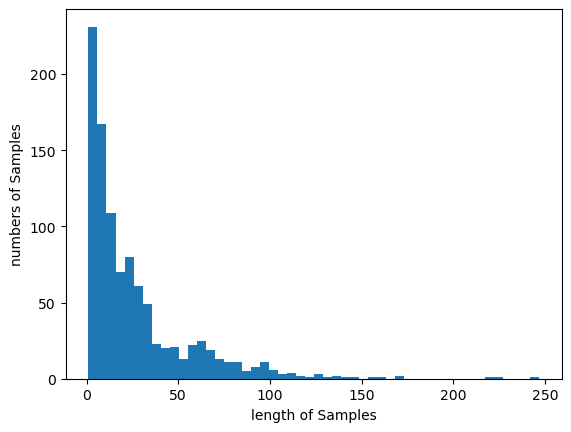

In [27]:
# 샘플의 원소 개수를 그래프로 표시
plt.hist([len(item) for item in X_train], bins=50)
plt.xlabel('length of Samples')
plt.ylabel('numbers of Samples')
plt.show()

In [29]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇%인지 확인하는 함수
def below_threshold_len( max_len, samples ) :
    count = 0
    for sample in samples :
        if len(sample) <= max_len :
            count = count + 1
    print(f"전체 샘플 중 길이가 {max_len}이하인 샘플의 비율 : {count/len(samples)*100:.2f}")

In [30]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30이하인 샘플의 비율 : 71.80


In [31]:
# 정수 인코딩된 훈련, 테스트 데이터에서, 길이가 일정 이하인것만 사용하기
'''result = []
for sample in X_train :
    if len(sample) <= max_len :
        result.append(sample)'''
# 샘플 개수 확인
print(len(X_train))
print(len(X_test))
# 샘플 원소 개수가 30개 이하인 샘플만 사용
# X_train = [ item for item in X_train if len(item) <= max_len ]
# -> y_train 의 샘플도 삭제
# X_test  = [ item for item in X_test  if len(item) <= max_len ]
# -> y_test 의 샘플도 삭제

# 15만건에서 정제
# 제거해야 할 샘플의 인덱스를 구하기 
drop_index = [ idx for idx, item in enumerate(X_train) if len(item) > max_len ]
# 인덱스 목록으로, X_train과 y_train에서 원소 제거
X_train = [x for i, x in enumerate(X_train) if i not in drop_train]
y_train = [y for i, y in enumerate(y_train) if i not in drop_train]

# 5만건에서 정제
drop_index = [ idx for idx, item in enumerate(X_test) if len(item) > max_len ]
X_test = [x for i, x in enumerate(X_test) if i not in drop_train]
y_test = [y for i, y in enumerate(y_test) if i not in drop_train]

# 정리된 샘플 개수 확인
print(len(X_train),len(y_train))     # 학습 데이터의 문제, 답 개수
print(len(X_test),len(y_test))     # 테스트 데이터의 문제, 답 개수

1000
453
1000 1000
453 453


In [32]:
# 모든 샘플들의 길이를 일정하게 변경하기
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test  = pad_sequences(X_test,  maxlen=max_len)

In [33]:
# pickle로 정수 인코딩된 데이터를 저장한다
with open('X_train_sequences.pickle','wb') as fw:
    pickle.dump(pad_X_train, fw)
with open('X_test_sequences.pickle','wb') as fw:
    pickle.dump(pad_X_test, fw)

import pickle
with open('y_train_filterd.pickle', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test_filterd.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [34]:
# vocab_size에 맞게 제한된 단어 사전 생성
# tokenizer.word_index는 {'단어': 인덱스} 형태의 딕셔너리
# 인덱스 번호는 빈도순 정렬
# tokenizer는 이미 vocab_size로 제한된 상태로 fit 되어 있음
limited_word_index = {}
for word, index in tokenizer.word_index.items():
    # vocab_size는 희귀 단어를 제외한 단어 수 + 1(패딩용)
    # word_index는 1부터 시작하므로, vocab_size보다 작은 인덱스를 가진 단어만 포함
    if index < vocab_size: 
        limited_word_index[word] = index

# 제한된 단어 사전을 JSON으로 저장
import json
# ensure_ascii=False는 한글이 깨지지 않게 저장하기 위함
with open('word_index.json', 'w', encoding='utf-8') as f:
    json.dump(limited_word_index, f, ensure_ascii=False)

print(f"\n[수정 후] 전체 단어 사전 크기: {len(tokenizer.word_index)}")
print(f"[수정 후] 저장된 단어 사전 크기: {len(limited_word_index)}")
print(f"의도한 vocab_size: {vocab_size}")


[수정 후] 전체 단어 사전 크기: 7022
[수정 후] 저장된 단어 사전 크기: 1927
의도한 vocab_size: 1928


https://github.com/e9t/nsmc/  
https://www.lucypark.kr/docs/2015-pyconkr